# Importing TensorFlow

In [1]:
!nvidia-smi

Wed Jun 19 23:58:32 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P5             14W /  100W |      14MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import tensorflow as tf
print(tf.__version__)

2024-06-19 23:58:32.523431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-19 23:58:32.545392: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 23:58:32.545410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 23:58:32.545983: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 23:58:32.550030: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data

In [4]:
with open("./bbc-text.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

category,text

Each data point looks like this:

tech,tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially

In [5]:
def remove_stopwords(sentence):
    
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    sentence = sentence.lower()
    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


def parse_data_from_file(filename):
    
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentence = row[1]
            sentence = remove_stopwords(sentence)
            sentences.append(sentence)

    return sentences, labels

In [6]:
sentences, labels = parse_data_from_file("./bbc-text.csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 2225 sentences in the dataset.

First sentence has 436 words (after removing stopwords).

There are 2225 labels in the dataset.

The first 5 labels are ['tech', 'business', 'sport', 'sport', 'entertainment']


In [7]:
train_size = int(len(sentences)*0.8)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]
val_sentences = sentences[train_size:]
val_labels = labels[train_size:]

In [8]:
print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 1780 sentences for training.

There are 1780 labels for training.

There are 445 sentences for validation.

There are 445 labels for validation.


# Tokenization

In [9]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [10]:
print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 27285 words

<OOV> token included in vocabulary


In [11]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = tf.keras.utils.pad_sequences(train_sequences, padding="post", maxlen=120)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded_seq = tf.keras.utils.pad_sequences(val_sequences, padding="post", maxlen=120)

In [12]:
print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (1780, 120)

Padded validation sequences have shape: (445, 120)


In [13]:
label_tokenizer = tf.keras.preprocessing.text.Tokenizer()
label_tokenizer.fit_on_texts(labels)

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
train_label_seq = np.array(train_label_sequences) - 1

val_label_sequences = label_tokenizer.texts_to_sequences(val_labels)
val_label_seq = np.array(val_label_sequences) - 1

In [14]:
print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[3]
 [1]
 [0]
 [0]
 [4]]

First 5 labels of the validation set should look like this:
[[4]
 [3]
 [2]
 [0]
 [0]]

Tokenized labels of the training set have shape: (1780, 1)

Tokenized labels of the validation set have shape: (445, 1)



# Creating and training the model

In [15]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(1000, 16, input_length=120),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(5, activation="softmax")
    ])

2024-06-19 23:58:34.945666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6070 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [16]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 18821 (73.52 KB)
Trainable params: 18821 (73.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


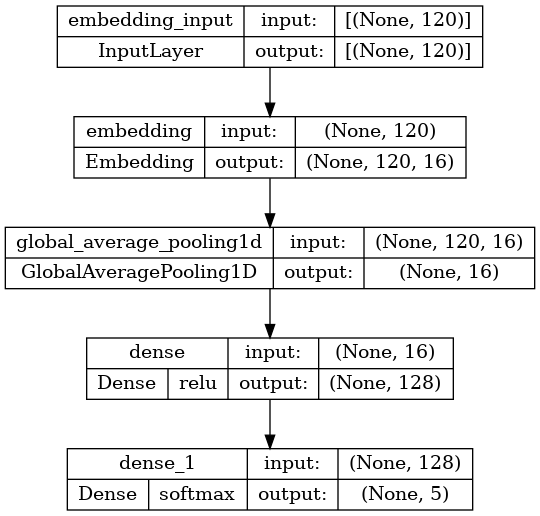

In [18]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True)

In [19]:
history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30


2024-06-19 23:58:35.550368: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-19 23:58:35.581563: I external/local_xla/xla/service/service.cc:168] XLA service 0x771dda857240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-19 23:58:35.581578: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-06-19 23:58:35.584920: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-19 23:58:35.597508: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1718830715.635870   50912 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 [==============================] - 3s 46ms/step - loss: 1.6012 - accuracy: 0.2567 - val_loss: 1.5861 - val_accuracy: 0.4337
Epoch 2/30
56/56 [==============================] - 1s 20ms/step - loss: 1.5452 - accuracy: 0.4236 - val_loss: 1.4767 - val_accuracy: 0.5483
Epoch 3/30
56/56 [==============================] - 1s 8ms/step - loss: 1.3134 - accuracy: 0.6815 - val_loss: 1.1438 - val_accuracy: 0.7191
Epoch 4/30
56/56 [==============================] - 1s 9ms/step - loss: 0.9104 - accuracy: 0.8534 - val_loss: 0.7645 - val_accuracy: 0.8697
Epoch 5/30
56/56 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.9202 - val_loss: 0.5049 - val_accuracy: 0.9011
Epoch 6/30
56/56 [==============================] - 0s 7ms/step - loss: 0.3526 - accuracy: 0.9382 - val_loss: 0.3626 - val_accuracy: 0.9169
Epoch 7/30
56/56 [==============================] - 0s 7ms/step - loss: 0.2452 - accuracy: 0.9556 - val_loss: 0.2930 - val_accuracy: 0.9213
Epoch 8/30
56/56 [===========

# Evaluating

<Axes: >

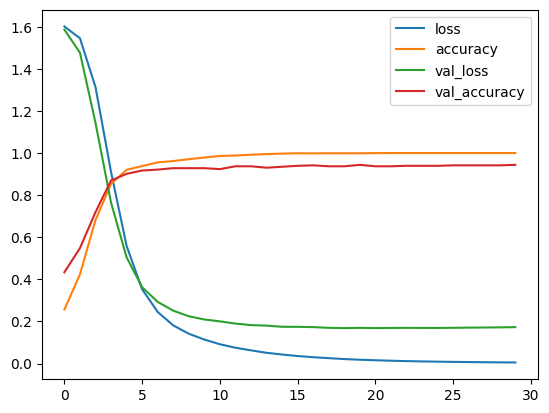

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
pred_probs = model.predict(val_padded_seq)

14/14 [==============================] - 0s 857us/step


In [22]:
preds = pred_probs.argmax(axis=-1)

In [23]:
val_label_seq.shape

(445, 1)

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_label_seq, preds)

In [25]:
cm

array([[100,   0,   1,   0,   0],
       [  0,  99,   4,   2,   1],
       [  3,   1,  79,   3,   0],
       [  0,   3,   0,  80,   3],
       [  0,   2,   1,   1,  62]])

In [26]:
cm_df = pd.DataFrame(data=cm)
cm_df

,0,1,2,3,4
0,100,0,1,0,0
1,0,99,4,2,1
2,3,1,79,3,0
3,0,3,0,80,3
4,0,2,1,1,62


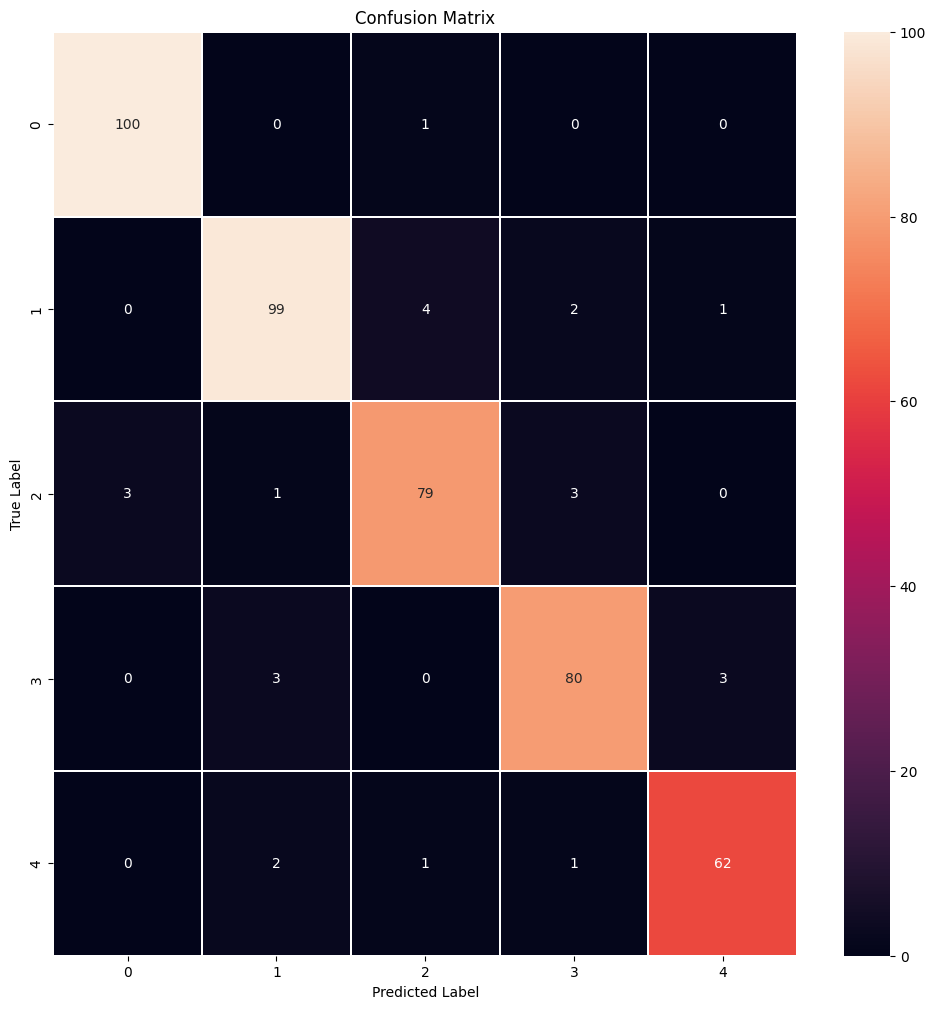

In [27]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(cm, annot=True, linewidths=0.1, cmap = "rocket", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()